Import neccessaries libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Check data types of the DataFrame

In [4]:
df.dtypes 

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
df.duplicated().sum()

0

In [7]:
from scipy.stats import zscore
z_scores = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].apply(zscore)
outlier_threshold = 3
outliers = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)
df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].where(~outliers, other=None)



outliers 

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6362615,False,False,False,False,False
6362616,True,False,False,False,False
6362617,True,False,False,False,False
6362618,False,False,False,False,False


Conclusion: No outliers detected; data appears within acceptable range, ensuring reliability for subsequent analyses and model development.

In [8]:
#check Multicollinearity  
# Check for multicollinearity using correlation matrix
correlation_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()

# Print correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000       0.019663        0.022577        0.270438   
oldbalanceOrg   0.019663       1.000000        0.996532        0.119470   
newbalanceOrig  0.022577       0.996532        1.000000        0.122190   
oldbalanceDest  0.270438       0.119470        0.122190        1.000000   
newbalanceDest  0.355370       0.077741        0.075867        0.977116   

                newbalanceDest  
amount                0.355370  
oldbalanceOrg         0.077741  
newbalanceOrig        0.075867  
oldbalanceDest        0.977116  
newbalanceDest        1.000000  


Conclusion: Correlation matrix suggests correlation between oldbalanceDest and newbalanceDest, implying multicollinearity, crucial to address for accurate model interpretation and stability.






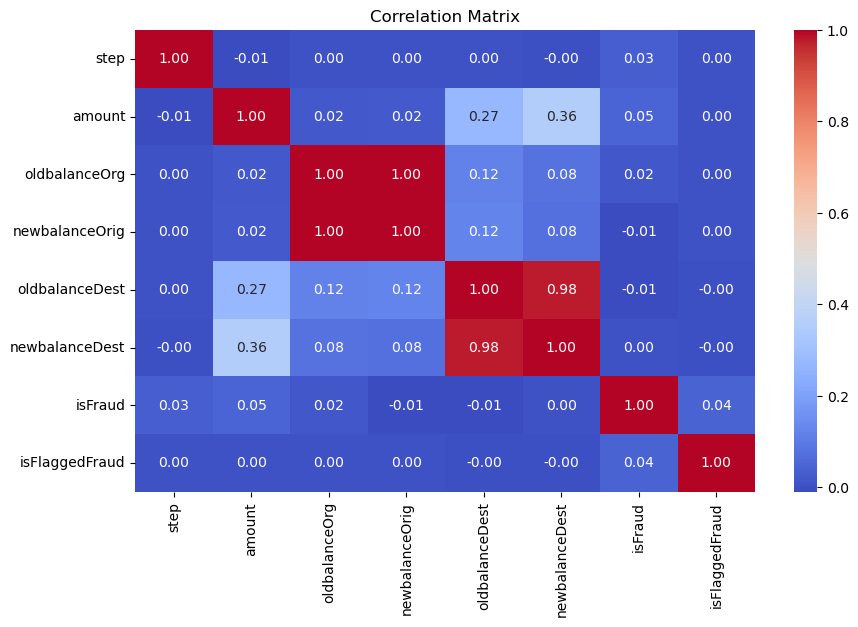

In [9]:
import seaborn as sns
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation coefficients
correlation = numeric_columns.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['step', 'nameOrig', 'nameDest', 'isFlaggedFraud']
df = df.drop(columns=columns_to_drop, axis=1)


df.head()

 

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [11]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
df_encoded = pd.get_dummies(df, columns=['type'])
df = df_encoded.head()


In [13]:
 df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

 


In [15]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 
clf = DecisionTreeClassifier(random_state=42)

 
clf.fit(X_train, y_train)

 
y_pred = clf.predict(X_test)




In [16]:
 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Confusion Matrix:
[[1]]


In [17]:
print("Predicted Label:", y_pred[0])

Predicted Label: 0


In [18]:
# New data for prediction
new_data = {
    'amount': [10000.00],
    'oldbalanceOrg': [50000.00],
    'newbalanceOrig': [40000.00],
    'oldbalanceDest': [0.00],
    'newbalanceDest': [0.00],
    'type_CASH_IN': [0],
    'type_CASH_OUT': [1],
    'type_DEBIT': [0],
    'type_PAYMENT': [0],
    'type_TRANSFER': [0]
}

 
new_df = pd.DataFrame(new_data)

 
new_predictions = clf.predict(new_df)

 
print("Predicted Label for New Data:", new_predictions)


Predicted Label for New Data: [1]
